Topics covered:

*   Namespaces
*   Decorators



## Namespaces

A namespace is a space that holds names(identifiers).Programmatically speaking, namespaces are dictionary of identifiers(keys) and their objects(values)

There are 4 types of namespaces:
- Builtin Namespace
- Global Namespace
- Enclosing Namespace
- Local Namespace

Suppose program has 2 variables:
- a=2
- b=3

Then, namespace will be -> {a:2,b:3}

### Scope and LEGB Rule

A scope is a textual region of a Python program where a namespace is directly accessible.

**LEGB rule** (Local,Enclosing,Global,Built-in) - The interpreter searches for a name from the inside out, looking in the local, enclosing, global, and finally the built-in scope. If the interpreter doesn’t find the name in any of these locations, then Python raises a NameError exception.

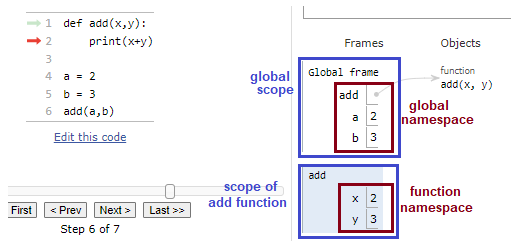

**Local and Global scope**

In [1]:
# local and global
a = 2    # global var

def temp():
  b = 3    # local var
  print(b)

temp()
print(a)

3
2


In [2]:
# local and global -> same name
a = 2

def temp():
  a = 3
  print(a)

temp()
print(a)

3
2


In [3]:
# local and global -> local does not have but global has
a = 2

def temp():
  print(a)

temp()
print(a)

2
2


In [4]:
# local and global -> editing global
a = 2

def temp():
  a += 1
  print(a)

temp()
print(a)

UnboundLocalError: local variable 'a' referenced before assignment

In local scope, we can view (read) global variables but can't update (write) on it directly. To update it, use global keyword. But it is not a good programming practice.

In [5]:
a = 2

def temp():
  global a
  a += 1
  print(a)

temp()
print(a)

3
3


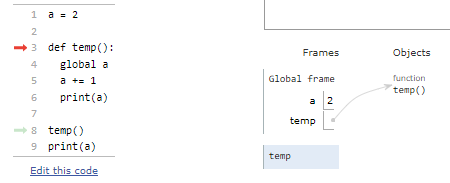

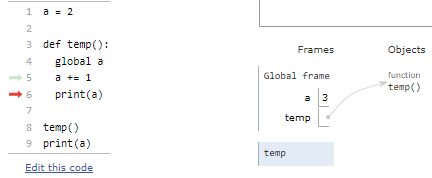

In [6]:
# local and global -> global created inside local
def temp():
  global a
  a = 1
  print(a)

temp()
print(a)

1
1


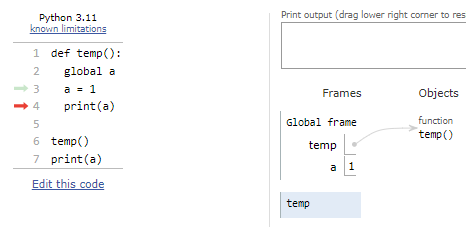

We can create global variable from local scope, but it not a good programming practice.

In [7]:
# local and global -> function parameter is local
def temp(z):
  print(z)

a = 5
temp(a)
print(a)
print(z)

5
5


NameError: name 'z' is not defined

**Built-in scope**

In [8]:
# built-in scope -> all pre-defined functions and variables
print('hello world')

hello world


In [9]:
# how to see all the built-ins
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EncodingWarning',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIt

In [10]:
# renaming built-ins
L = [1,2,3]
print(max(L))

def max():   # overriding built-in max function
  print('hello')

print(max(L))

3


TypeError: max() takes 0 positional arguments but 1 was given

**Enclosing scope**

In [11]:
# Enclosing scope - for nested functions
def outer():
  def inner():
    print('inner function')
  inner()
  print('outer function')

outer()
print('main program')

inner function
outer function
main program


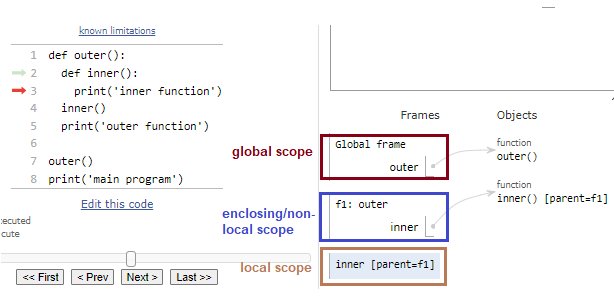

In [12]:
def outer():
  a = 2
  def inner():
    a = 3
    print(a)
  inner()
  print('outer function')

a = 1
outer()
print('main program')

3
outer function
main program


In [13]:
def outer():
  a = 2
  def inner():
    print(a)
  inner()
  print('outer function')

a = 1
outer()
print('main program')

2
outer function
main program


In [14]:
def outer():
  def inner():
    print(a)
  inner()
  print('outer function')

a = 1
outer()
print('main program')

1
outer function
main program


In [1]:
def outer():
  def inner():
    print(a)
  inner()
  print('outer function')

outer()
print('main program')

NameError: name 'a' is not defined

In [19]:
def outer():
  a = 1
  def inner():
    a += 1
    print('inner',a)
  inner()
  print('outer',a)

outer()
print('main program')

UnboundLocalError: local variable 'a' referenced before assignment

In local scope, we can view (read) enclosing variables but can't update (write) on it directly. To update it, use nonlocal keyword. But it is not a good programming practice.

In [20]:
# nonlocal keyword
def outer():
  a = 1
  def inner():
    nonlocal a
    a += 1
    print('inner',a)
  inner()
  print('outer',a)

outer()
print('main program')

inner 2
outer 2
main program


## Decorators

A decorator in python is a function that receives another function as input and adds some functionality(decoration) to it and returns it.

This can happen only because python functions are 1st class citizens.

There are 2 types of decorators available in python
- `Built in decorators` like `@staticmethod`, `@classmethod`, `@abstractmethod` and `@property` etc
- `User defined decorators` that we programmers can create according to our needs

In [2]:
# Python are 1st class function
def function():
  print('hello')

a = function
a()

hello


In [3]:
def function():
  print('hello')

del function
function()

NameError: name 'function' is not defined

In [5]:
def modify(func,num):
  return func(num)

def square(num):
  return num**2

modify(square,8)

64

In [7]:
# decorator example
def my_decorator(func):
  def wrapper():
    print('*'*50)
    func()
    print('*'*50)
  return wrapper   # wrapper function will return

def hello():
  print('hello')

a = my_decorator(hello)  # 'a' will get wrapper function
a()

**************************************************
hello
**************************************************


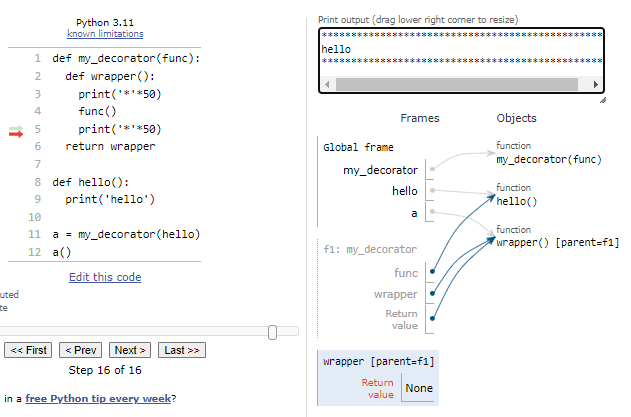

In [8]:
def outer():
    a = 5
    def inner():
        print(a)
    return inner

b = outer()
b()

5


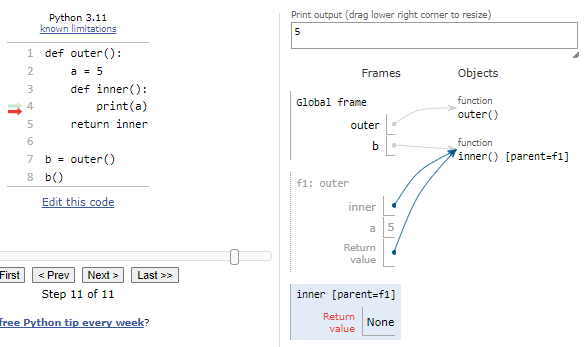

How this works -> It is based on **Closure**.

**Closures in Python**:

A closure in Python occurs when a nested function captures the local variables from its enclosing scope. This allows the nested function to access these variables even after the outer function has finished executing.

Closures are created when:

*   There is a nested function.
*   The nested function references a value in its enclosing scope.
*   The enclosing function returns the nested function.


In [11]:
# closure example code
def outer_function(msg):
    message = msg

    def inner_function():
        print(message)

    return inner_function

closure = outer_function("Hello, World!")
closure()

Hello, World!


In [12]:
#  better syntax
def my_decorator(func):
  def wrapper():
    print('*'*50)
    func()
    print('*'*50)
  return wrapper

@my_decorator
def hello():
  print('hello')

hello()

**************************************************
hello
**************************************************


In [15]:
# decorator to find execution time of function
import time
def timer(func):
  def wrapper():
    start = time.time()
    func()
    print('Time taken by',func.__name__,time.time()-start,'secs')
  return wrapper

@timer
def hello():
  print('hello world')
  time.sleep(2)

@timer
def display():
  print('inside display function')

hello()
display()

hello world
Time taken by hello 2.002200126647949 secs
inside display function
Time taken by display 0.00016355514526367188 secs


In [17]:
@timer
def square(num):
  print(num**2)

square(3)

# above timer decorator works only for zero argument function

TypeError: timer.<locals>.wrapper() takes 0 positional arguments but 1 was given

In [20]:
# decorator to find execution time of function
import time
def timer(func):
  def wrapper(*args):  # passing *args in wrapper
    start = time.time()
    func(*args)    # passing *args
    print('Time taken by',func.__name__,time.time()-start,'secs')
  return wrapper

@timer
def hello():
  print('hello world')
  time.sleep(2)

@timer
def square(num):
  print(num**2)

@timer
def power(a,b):
  print(a**b)

hello()
square(5)
power(4,3)

hello world
Time taken by hello 2.002798080444336 secs
25
Time taken by square 0.0004391670227050781 secs
64
Time taken by power 2.1696090698242188e-05 secs


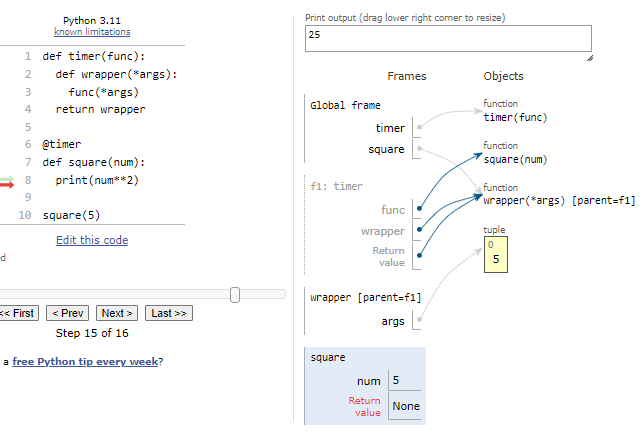

In [21]:
def square(num):
  print(num**2)

In [22]:
square(2)

4


In [23]:
square('hello')

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [30]:
# decorator to check if input given is valid or not
def check_datatype(data_type):
  def outer_wrapper(func):
    def inner_wrapper(*args):
      if type(*args) == data_type:
        func(*args)
      else:
        raise TypeError('Invalid datatype')
    return inner_wrapper
  return outer_wrapper

@check_datatype(int)
def square(num):
  print(num**2)

@check_datatype(str)
def hello(name):
  print('hello',name)

square(5)
hello('nitish')

25
hello nitish


In [31]:
square('machine')

TypeError: Invalid datatype

In [32]:
hello(5)

TypeError: Invalid datatype